Run the cells below:

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr

In [2]:
#Load data on 6 size x bm portfolios (annual VW returns)
raw = pdr.DataReader(name = '6_Portfolios_2x3', data_source = 'famafrench', 
                     start = '2011-01-01', end = '2020-12-31')[2]/100

#Rename the columns
raw.columns = pd.MultiIndex.from_product([['Small','Big'], ['lowBM','medBM','highBM']], names = ['Size','BM'])
raw

Size     Small                           Big                    
BM       lowBM     medBM    highBM     lowBM     medBM    highBM
Date                                                            
2011 -0.061680 -0.046385 -0.081817  0.042122  0.050152 -0.108594
2012  0.148000  0.173728  0.211698  0.152935  0.133936  0.286275
2013  0.445860  0.422425  0.424361  0.330265  0.328741  0.404713
2014  0.047282  0.046150  0.038384  0.136324  0.113643  0.115993
2015 -0.028641 -0.030908 -0.097172  0.043370 -0.003420 -0.078721
2016  0.082497  0.234802  0.365866  0.089963  0.134866  0.259403
2017  0.253839  0.134554  0.093498  0.291184  0.157087  0.182019
2018 -0.076285 -0.109226 -0.129023 -0.001631 -0.067676 -0.144950
2019  0.298197  0.257710  0.151064  0.338510  0.274286  0.275972
2020  0.574508  0.115714  0.036091  0.362439  0.008197 -0.031121

In [3]:
#Stack BM portfolios on top of each other
bmstack = raw.stack(level=1).reset_index()
bmstack.head(6)

Size,Date,BM,Big,Small
0,2011,highBM,-0.108594,-0.081817
1,2011,lowBM,0.042122,-0.061680
2,2011,medBM,0.050152,-0.046385
3,2012,highBM,0.286275,0.211698
4,2012,lowBM,0.152935,0.148000
5,2012,medBM,0.133936,0.173728


In [4]:
#Stack Size portfolios on top of each other
szstack = raw.stack(level=0).reset_index()
szstack.head(6)

BM,Date,Size,highBM,lowBM,medBM
0,2011,Big,-0.108594,0.042122,0.050152
1,2011,Small,-0.081817,-0.061680,-0.046385
2,2012,Big,0.286275,0.152935,0.133936
3,2012,Small,0.211698,0.148000,0.173728
4,2013,Big,0.404713,0.330265,0.328741
5,2013,Small,0.424361,0.445860,0.422425


In [5]:
#Full stack
fullstack = raw.stack(level = [0,1]).reset_index().rename(columns = {0:'vwret'})
fullstack.head(6)

,Date,Size,BM,vwret
0,2011,Big,highBM,-0.108594
1,2011,Big,lowBM,0.042122
2,2011,Big,medBM,0.050152
3,2011,Small,highBM,-0.081817
4,2011,Small,lowBM,-0.061680
5,2011,Small,medBM,-0.046385


You can use any of the dataframes above to answer any of the questions below. You will notice that, generally, each question is much easier to answer using one of these dataframes rather than the rest. 

Plot the time-series of returns of each of the three "Big" portfolios (in a single plot).

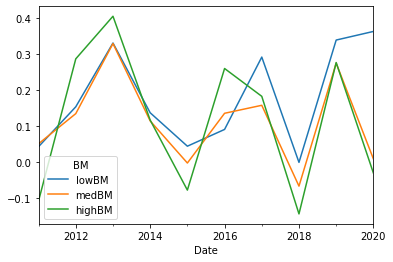

In [6]:
raw['Big'].plot();

Create a table which contains the average returns of each of the 6 portfolios in the dataset (3 small and 3 big). This should be a 3 x 2 table. Which of the 6 portfolios has had the best performance over these last 10 years?

In [7]:
bmstack.groupby('BM').mean()

Size,Big,Small
BM,,
highBM,0.116099,0.101295
lowBM,0.178548,0.168358
medBM,0.112981,0.119856


Now create an analogous table that contains standard deviations of returns for each of the 6 portfolios. Does the risk-return tradeoff seem to apply?

In [8]:
bmstack.groupby('BM').std()

Size,Big,Small
BM,,
highBM,0.194640,0.189523
lowBM,0.139341,0.221147
medBM,0.123175,0.161650


Each year, calculate the average returns of the 3 "small" portfolios and the 3 "big" portfolios. Then plot these annual averages in the same plot: one for the "small" portolios and one for the "big" portfolios.

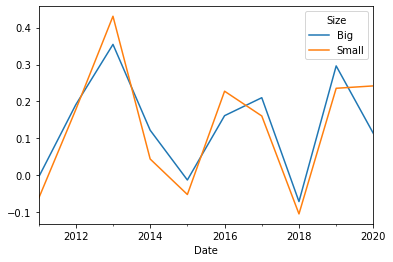

In [9]:
bmstack.groupby('Date').mean().plot();

Each year, calculate the average return of the two "lowBM" portfolios (the "Small" one and the "Big" one), the average return of the two "medBM" portfolios, and the average return of the two "highBM" portfolios. Plot these 3 time-series of average returns in the same plot. 

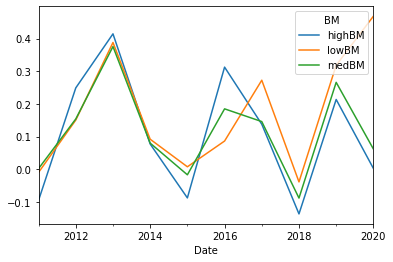

In [10]:
szstack.groupby('Date').mean().plot();

Add a column to the ``fullstack`` dataframe (call it "maxret") that, for each year, gives us the maximum return among the returns of the 6 portfolios that year (i.e. this value will be the same for all the 6 rows corresponding to that year). Display the first 12 rows of this new version of ``fullstack``.

In [11]:
fullstack['maxret'] = fullstack.groupby('Date')['vwret'].transform('max')
fullstack.head(12)

,Date,Size,BM,vwret,maxret
0,2011,Big,highBM,-0.108594,0.050152
1,2011,Big,lowBM,0.042122,0.050152
2,2011,Big,medBM,0.050152,0.050152
3,2011,Small,highBM,-0.081817,0.050152
4,2011,Small,lowBM,-0.061680,0.050152
5,2011,Small,medBM,-0.046385,0.050152
6,2012,Big,highBM,0.286275,0.286275
7,2012,Big,lowBM,0.152935,0.286275
8,2012,Big,medBM,0.133936,0.286275
9,2012,Small,highBM,0.211698,0.286275


Print the time-series of returns you would achieve if you were able to perfectly time which of the 6 portfolios was going to have the largest return that year.

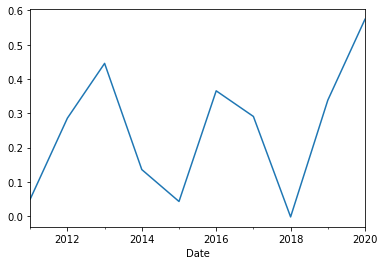

In [12]:
fullstack.groupby('Date')['vwret'].apply(np.max).plot();

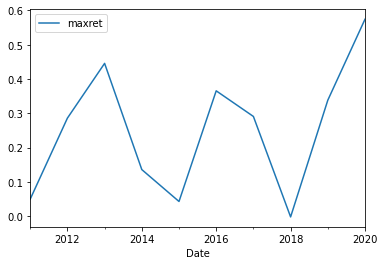

In [13]:
#or
fullstack[['Date','maxret']].drop_duplicates().set_index('Date').plot();